* FASE 4

#La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

1- Divide a los empleados en los grupos A y B según los criterios establecidos.
Columna Satisfaction_Group 
2- Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
#Porcentajes segun grupo A y B

3- Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
#Prueba de hipotesis con método ttest_ind() con cada grupo.
H0= Afirmamos que no hay diferencia
H1= Afirmamos que si la hay, los datos no se corresponden.

4- Analiza los resultados.
#Afirmar si H0 o H1

5- Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.
(Leccion ab testing)

In [10]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [11]:
df_fase4 = pd.read_csv("HR_CLEAN_dATA.csv")
df_fase4.head()

,Employee_Number,Age,Age_Group,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Satisfaction_Group,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Curr_Manager,Date_Birth,Remote_Work
0,162,51,46-55,False,Unknown,684,Research & Development,6,3,Unknown,1,M,51,3,5,Research Director,3,Unknown,6462,7,False,0.13,3,3,0,A,11,5,3,20,15,15,1972,True
1,259,52,46-55,False,Unknown,699,Unknown,1,4,Life Sciences,3,M,65,2,5,Manager,3,Unknown,5678,0,Unknown,0.14,3,1,1,A,34,5,3,33,11,9,1971,True
2,319,42,36-45,False,Travel Rarely,532,Research & Development,4,2,Technical Degree,3,M,58,3,5,Manager,4,Married,4933,1,False,0.11,3,4,0,A,22,3,3,22,11,15,1981,True
3,2069,47,46-55,False,Travel Rarely,359,Research & Development,2,4,Medical,1,F,82,3,4,Research Director,3,Married,26703,3,Unknown,0.19,3,2,2,A,11,2,3,20,5,6,1976,False
4,2070,46,46-55,False,Unknown,1319,Sales,3,3,Technical Degree,1,F,45,4,4,Sales Executive,1,Divorced,7739,2,False,0.12,3,4,1,B,11,5,3,19,2,8,1977,False


In [13]:
df = df_fase4.copy()

In [14]:
#separar en 2 grupos
#GRUPO A satisfacción igual o mayor a 3
#GRUPO B satisfacción menor a 3
grupo_a = df[df['Satisfaction_Group'] == "A"]
grupo_b = df[df['Satisfaction_Group'] == "B"]

In [16]:
# Calcular la tasa de rotación (porcentaje de empleados que dejaron la empresa) para cada grupo
tasa_rotacion_a = grupo_a['Attrition'].value_counts(normalize=True).get(True, 0) * 100
tasa_rotacion_b = grupo_b['Attrition'].value_counts(normalize=True).get(True, 0) * 100

print(f"Tasa de rotación en el Grupo A (satisfaccion igual o mayor a 3): {tasa_rotacion_a.round(2)}%")
print(f"Tasa de rotación en el Grupo B(satisfaccion menor a 3): {tasa_rotacion_b.round(2)}%")

Tasa de rotación en el Grupo A (satisfaccion igual o mayor a 3): 13.86%
Tasa de rotación en el Grupo B(satisfaccion menor a 3): 19.65%


In [ ]:
#3- Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
#Prueba de hipotesis con método ttest_ind() con cada grupo.
# H0= Afirmamos que no hay diferencia
# H1= Afirmamos que si la hay, los datos no se corresponden.


In [17]:
grupo_a.columns

Index(['Employee_Number', 'Age', 'Age_Group', 'Attrition', 'Business_Travel',
       'Daily_Rate', 'Department', 'Distance_From_Home', 'Education',
       'Education_Field', 'Environment_Satisfaction', 'Gender', 'Hourly_Rate',
       'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction',
       'Marital_Status', 'Monthly_Rate', 'Num_Companies_Worked', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level', 'Satisfaction_Group',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Curr_Manager', 'Date_Birth', 'Remote_Work'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='count'>

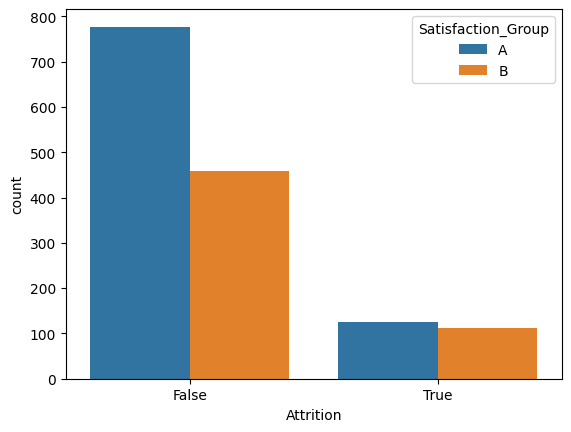

In [7]:
# Gráfico : 
sns.countplot(x="Attrition", data= df, hue="Satisfaction_Group")
#plt.set_title("Analisis Grupos")

#Según este gráfico, podemos pensar, a simple vista, que no hay relación significativa entre el nivel de satisfacción y el abandono de la empresa.

<Axes: xlabel='Satisfaction_Group', ylabel='Count'>

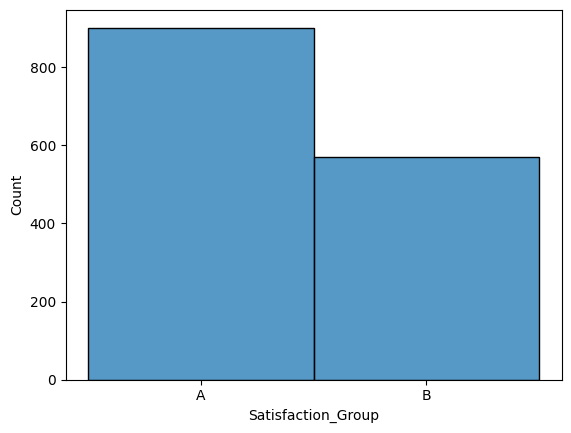

In [18]:
#Entendemos ,según la tasa de rotación y este gráfico que la gente menos satisfecha abandona en mayor proporción la empresa en comparación con la gente más satisfecha.

sns.histplot(data= df, x= "Satisfaction_Group")

In [31]:
grupo_b.head(3)

,Employee_Number,Age,Age_Group,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Satisfaction_Group,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Curr_Manager,Date_Birth,Remote_Work
4,2070,46,46-55,False,Unknown,1319,Sales,3,3,Technical Degree,1,F,45,4,4,Sales Executive,1,Divorced,7739,2,False,0.12,3,4,1,B,11,5,3,19,2,8,1977,False
6,81,59,56-65,False,Unknown,1435,Sales,25,3,Life Sciences,1,F,99,3,3,Sales Executive,1,Unknown,2354,7,Unknown,0.11,3,4,0,B,28,3,2,21,7,9,1964,True
8,2071,41,36-45,False,Unknown,1276,Unknown,2,5,Unknown,2,F,91,3,4,Manager,1,Married,5626,7,False,0.16,3,2,1,B,22,2,3,18,11,8,1982,True


In [29]:
test_student= ttest_ind(a=grupo_a["Attrition"], b=grupo_b["Attrition"], equal_var=False) # la tasa de rotacion
test_student[1]

Ttest_indResult(statistic=-2.8601022828617735, pvalue=0.004316160331922343)

In [ ]:
# chis
# validar desde el data original

In [44]:
alpha= 0.05

if test_student[1] > alpha:
    print(f"El p_value es: {test_student[1]}, por lo que rechaza la H0. Es decir, sí existe una diferencia significativa en la tasa de rotación.")
else:
    print(f"El p_value es: {test_student[1].round(3)}, por lo que no se rechaza la . Es decir, NO encontramos diferencia significativa entre los grupos.")


El p_value es: 0.004, por lo que no se rechaza la H0, ya que NO encontramos diferencia significativa entre los grupos.


In [40]:
# 5- Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.
media_GrupoA= grupo_a["Attrition"].mean()
media_GrupoB =grupo_b["Attrition"].mean()
diferencia= (media_GrupoB-media_GrupoA).round(2)
print(f"La diferencia entre las medias de ambos grupos es de: {diferencia}")

La diferencia entre las medias de ambos grupos es de: 0.06
